In [1]:
import warnings
warnings.filterwarnings("ignore")

# Univariate Optimization


- To make a math variable in python use symbols from sympy.
- To differentiate(derivative) a function use diff from sympy.
- To solve an equation use solve from sympy.


In [2]:
from sympy import symbols, diff, solve

q = symbols('q')
P = 40*q - 0.5*q**2
dP = diff(P, q)
print(dP)
q_opt = solve(dP, q)
print(q_opt)

40 - 1.0*q
[40.0000000000000]


In [3]:
y = symbols('y')
Q = q**2 + y**2
solve(Q, q)

[-I*y, I*y]

To be sure that we have found a maximum point, we can check the second derivative of the profit function.

- If 2nd drivative at the point < 0: Maxima
- If 2nd drivative at the point > 0: Minima
- If 2nd drivative at the point = 0: neither


To compensation a variable we can use subs from sympy.


In [4]:
d2p_dp2 = diff(dP, q)
print(d2p_dp2.subs(q, q_opt[0]))  # Substitute q

-1.00000000000000


# Multivariate Optimization


In [5]:
# Define symbols K, L
K, L = symbols('K L')

F = -3*K**2 + 100* K - (1/2)*L**2 + 100*L

In [6]:
# Derive the partial derivatives
dF_dK = diff(F,K)
dF_dL = diff(F,L)

In [7]:
# Solve the equations
crit_points = solve([dF_dK,dF_dL],(K,L))
print(crit_points)

{K: 16.6666666666667, L: 100.000000000000}


In [8]:
F.subs({K: crit_points[K], L: crit_points[L]})

5833.33333333333

# Unconstrained optimization


We can use scipy package to optimize functions in more efficient way.


In [9]:
from scipy.optimize import minimize_scalar

# Define the new objective function
def negated_function(x):
  return -1*(-(x**2) + 3*x - 5)

# Maximize the negated function
result = minimize_scalar(negated_function)

# Print the result
print(f"The maximum is {result.x:.2f} in two decimals")

The maximum is 1.50 in two decimals


In [10]:
result

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: 2.7500000000000004
       x: 1.4999999999999998
     nit: 5
    nfev: 8

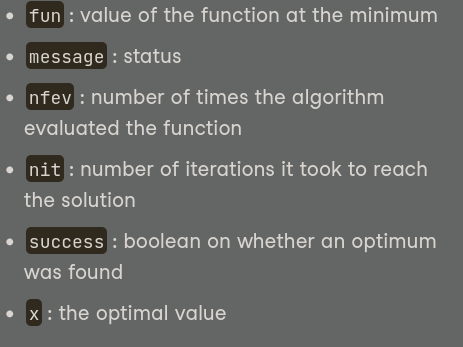


To optimize multicariable functions with constraints we can use minimize from scipy.optimize.


In [11]:
from scipy.optimize import minimize

def objective_function(a):
  return (a[0] - 2)**2 + (a[1] - 3)**2 + 3 

# Save your initial guess
x0 = [1,2]

# Calculate and print the minimum
result = minimize(objective_function, x0)
print(f"minimum is (x, y) = ({result.x[0]:.2f}, {result.x[1]:.2f}) in two decimals.")

minimum is (x, y) = (2.00, 3.00) in two decimals.


## Bound constraints

In many optimazation problems, the variables are restricted to lie within certain bounds. For example, the company can only produce between 50 and 100 units per day.


In constrained problems we can Bound from scipy.optimize to set the limits for each variable.


In [12]:
from scipy.optimize import Bounds

def objective_function(b):
  return (b[0] - 6)**2 + (b[1] - 8)**2 + 3

# Set the bounds of your problem
bounds = Bounds(2,100)

x0 = [10, 5]

# Find the minimum
result = minimize(objective_function,x0,method='L-BFGS-B',bounds=bounds)

print(result.x)

[6.         7.99999999]


Handling hard inequalities

Back in the coffee shop, you want to look at minimizing daily expenses. You have an objective function that calculates your production costs, and a constraint function that tells you the limits of how much coffee you can produce.

Apply scipy to find the optimal allocation of resources to minimize costs.


    Set the constraint variable using a dictionary.
    Apply scipy to find the optimal value.


In [13]:
def objective_function(b):
  return (b[0] - 5) ** 2 + (b[1] - 3) ** 3

def constraint_function(x):
    return 2*x[0] + 3*x[1] - 6

# Set the constraint variable
constraint = {
    'type': 'ineq',
    'fun': constraint_function
}

x0 = [20, 20]

# Find the minimum
result = minimize(objective_function, x0, constraints=constraint)

print(result)

     message: Inequality constraints incompatible
     success: False
      status: 4
         fun: -5619245428386987.0
           x: [ 2.668e+05 -1.778e+05]
         nit: 3
         jac: [ 0.000e+00  9.482e+10]
        nfev: 9
        njev: 3
 multipliers: [ 1.731e+05]


# Linear programming

Linear programming is a method to achieve the best outcome in a mathematical model whose requirements are represented by linear relationships.
In linear programming problems, we can use PuLP package in python to solve them.


---


PuLP for linear optimization

A farmer faces a diet problem for their cattle.
The vet's recommendation is that each animal is fed at least 7 pounds of a mix of corn and soybean with at least 17% protein and 2% fat. Below are the relevant nutritional elements:
Food type | Cost ($/lb) | Protein (%) | Fat (%)
| --- | --- | --- | --- |
corn | 0.11 | 10 | 2.5
soybean | 0.28 | 40 | 1

You will use this information to minimize costs subject to nutritional constraints.

pulp has been imported for you.

- Define a model for minimization called "MinCost".
- Define the variables for corn ("C") and soybean ("S") and make sure they are non-negative.
- d the objective function and constraints to the model using the vet's recommendations.
- Solve the model.


Solution:


$P = C * 0.11 + S * 0.28$


In [14]:
from pulp import *

# Define the model
model = LpProblem("MinCost", LpMinimize) 

# Define the variables
C = LpVariable("C", lowBound=0)
S = LpVariable("S", lowBound=0) 

# Add the objective function and constraints
model += 0.11*C + 0.28*S
model += 40*S + 10*C >= 17*(C+S), "M_protein"
model += S + 2.5*C >= 2*(C+S), "M_fat"
model += C + S >= 7, "M_weight"

# Solve the model

model.solve()
print(f"Cost = {value(model.objective):.2f}")
print(f"Pounds of soybean = {S.varValue:.2f}, pounds of corn = {C.varValue:.2f}") 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/shk/.local/lib/python3.13/site-packages/pulp/apis/../solverdir/cbc/linux/i64/cbc /tmp/8e255761eba942129653e9a8bdfede37-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /tmp/8e255761eba942129653e9a8bdfede37-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 8 COLUMNS
At line 17 RHS
At line 21 BOUNDS
At line 22 ENDATA
Problem MODEL has 3 rows, 2 columns and 6 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 3 (0) rows, 2 (0) columns and 6 (0) elements
0  Obj 0 Primal inf 6.9999999 (1)
2  Obj 1.0476667
Optimal - objective value 1.0476667
Optimal objective 1.047666667 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00

Cost = 1.05
Pounds of soybean = 1.63, pounds of corn = 5.37


That was superb! Piecing together the objective functions and constraints can be tricky but you did it and successfully minimized the cost for the farmer.


Exercise2:
Handling multiple elements

The farmer wants to replicate the previous optimization function to detail with more complicated meals for other animals on the farm.

The previous code has been provided. Can you adjust the previous code to make it better at handling multiple variables?

pulp has been imported for you.


- Adjust the variable definition to use `LpVariable.dicts()`, saving them as variables with the name "Food".
- Adjust the objective function to use `lpSum()`.


In [15]:
from pulp import *

# Define the model
model = LpProblem("MinCost", LpMinimize) 

# Define the variables
variables = LpVariable.dicts("Food", ["C", "S"], lowBound=0)

# Add the objective function and constraints
model += lpSum([0.11*variables["C"], 0.28*variables["S"]])
model += 40*variables["S"] + 10*variables["C"] >= 17*(variables["C"]+variables["S"]), "M_protein"
model += variables["S"] + 2.5*variables["C"] >= 2*(variables["C"]+variables["S"]), "M_fat"
model += variables["C"] + variables["S"] >= 7, "M_weight"

# Solve the model

model.solve()
print(f"Cost = {value(model.objective):.2f}")
print(f"Pounds of soybean = {variables['S'].varValue:.2f}, pounds of corn = {variables['C'].varValue:.2f}") 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/shk/.local/lib/python3.13/site-packages/pulp/apis/../solverdir/cbc/linux/i64/cbc /tmp/229c6a9ab4eb4b1db3dc51d984838e76-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /tmp/229c6a9ab4eb4b1db3dc51d984838e76-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 8 COLUMNS
At line 17 RHS
At line 21 BOUNDS
At line 22 ENDATA
Problem MODEL has 3 rows, 2 columns and 6 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 3 (0) rows, 2 (0) columns and 6 (0) elements
0  Obj 0 Primal inf 6.9999999 (1)
2  Obj 1.0476667
Optimal - objective value 1.0476667
Optimal objective 1.047666667 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00

Cost = 1.05
Pounds of soybean = 1.63, pounds of corn = 5.37


# Convex constrained-optimization


## Mathematical Solution (Lagrange Multipliers)

**Problem:** Maximize $U(c, m) = c^{0.7} \cdot m^{0.3}$ subject to $c + m = 2$

---

### Step 1: Set up the Lagrangian

$$\mathcal{L}(c, m, \lambda) = c^{0.7} m^{0.3} - \lambda(c + m - 2)$$

---

### Step 2: Take partial derivatives and set equal to zero

$$\frac{\partial \mathcal{L}}{\partial c} = 0.7 \cdot c^{-0.3} \cdot m^{0.3} - \lambda = 0 \quad \Rightarrow \quad \lambda = 0.7 \cdot \frac{m^{0.3}}{c^{0.3}}$$

$$\frac{\partial \mathcal{L}}{\partial m} = 0.3 \cdot c^{0.7} \cdot m^{-0.7} - \lambda = 0 \quad \Rightarrow \quad \lambda = 0.3 \cdot \frac{c^{0.7}}{m^{0.7}}$$

$$\frac{\partial \mathcal{L}}{\partial \lambda} = -(c + m - 2) = 0 \quad \Rightarrow \quad c + m = 2$$

---

### Step 3: Solve by equating the two expressions for $\lambda$

$$0.7 \cdot \frac{m^{0.3}}{c^{0.3}} = 0.3 \cdot \frac{c^{0.7}}{m^{0.7}}$$

Multiply both sides by $\frac{c^{0.3} \cdot m^{0.7}}{1}$:

$$0.7 \cdot m^{0.3} \cdot m^{0.7} = 0.3 \cdot c^{0.7} \cdot c^{0.3}$$

$$0.7 \cdot m = 0.3 \cdot c$$

$$\frac{m}{c} = \frac{0.3}{0.7} = \frac{3}{7}$$

$$m = \frac{3}{7}c$$

---

### Step 4: Substitute into the constraint

$$c + m = 2$$
$$c + \frac{3}{7}c = 2$$
$$\frac{10}{7}c = 2$$
$$c = \frac{14}{10} = 1.4$$

$$m = 2 - c = 2 - 1.4 = 0.6$$

---

### ✅ Solution

$$\boxed{c^* = 1.4, \quad m^* = 0.6}$$

**Key Insight:** The optimal allocation ratio is $\displaystyle\frac{c}{m} = \frac{0.7}{0.3} = \frac{7}{3}$, which exactly matches the ratio of the exponents in the Cobb-Douglas function!


In [18]:
import numpy as np
# Define the utility function
def utility_function(vars):
    c,m = vars
    return -(c**0.7*m**0.3)

# Define the constraint function
def constraint(vars):
    return 2-np.sum(vars)

initial_guess = [12, 12]  

# Set up the constraint
constraint_definition = {'type':'eq','fun':constraint}

# Perform optimization
result = minimize(utility_function,initial_guess,constraints=constraint_definition)
c,m = result.x

print("Optimal study hours for classical music:", round(c, 2))
print("Optimal study hours for modern music:", round(m, 2))

Optimal study hours for classical music: 1.4
Optimal study hours for modern music: 0.6


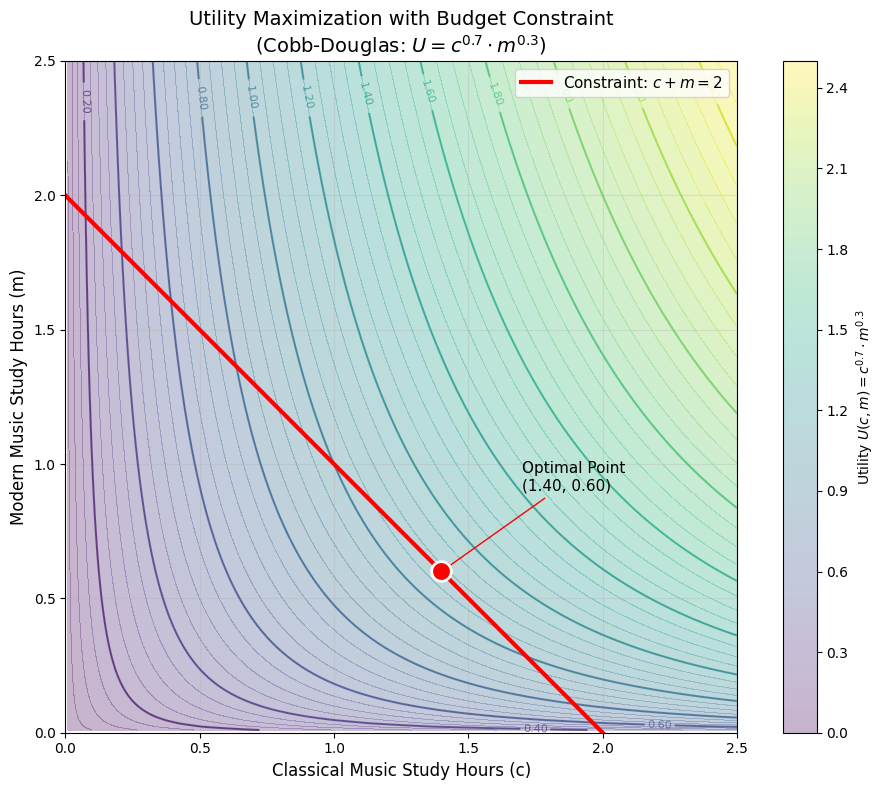


📊 Interpretation:
   • The colored contours show levels of equal utility (indifference curves)
   • The red line is the budget constraint (c + m = 2)
   • The optimal point is where the constraint is tangent to the highest utility contour
   • Allocation: 140.0% classical, 60.0% modern (matches exponents 0.7 and 0.3!)


In [19]:
import matplotlib.pyplot as plt

# Create a grid for visualization
c_vals = np.linspace(0.01, 2.5, 200)
m_vals = np.linspace(0.01, 2.5, 200)
C, M = np.meshgrid(c_vals, m_vals)

# Calculate utility values (positive for visualization)
U = C**0.7 * M**0.3

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot contour lines of the utility function
contours = ax.contour(C, M, U, levels=15, cmap='viridis', alpha=0.7)
ax.clabel(contours, inline=True, fontsize=8, fmt='%.2f')

# Plot filled contours
contourf = ax.contourf(C, M, U, levels=50, cmap='viridis', alpha=0.3)
plt.colorbar(contourf, label='Utility $U(c,m) = c^{0.7} \cdot m^{0.3}$')

# Plot the constraint line: c + m = 2
c_constraint = np.linspace(0, 2, 100)
m_constraint = 2 - c_constraint
ax.plot(c_constraint, m_constraint, 'r-', linewidth=3, label='Constraint: $c + m = 2$')

# Plot the optimal point
c_opt, m_opt = result.x
ax.scatter([c_opt], [m_opt], color='red', s=200, zorder=5, edgecolor='white', linewidth=2)
ax.annotate(f'Optimal Point\n({c_opt:.2f}, {m_opt:.2f})', 
            xy=(c_opt, m_opt), xytext=(c_opt + 0.3, m_opt + 0.3),
            fontsize=11, ha='left',
            arrowprops=dict(arrowstyle='->', color='red'))

# Labels and title
ax.set_xlabel('Classical Music Study Hours (c)', fontsize=12)
ax.set_ylabel('Modern Music Study Hours (m)', fontsize=12)
ax.set_title('Utility Maximization with Budget Constraint\n(Cobb-Douglas: $U = c^{0.7} \cdot m^{0.3}$)', fontsize=14)
ax.legend(loc='upper right', fontsize=11)
ax.set_xlim(0, 2.5)
ax.set_ylim(0, 2.5)
ax.grid(True, alpha=0.3)
ax.set_aspect('equal')

plt.tight_layout()
plt.show()

print(f"\n📊 Interpretation:")
print(f"   • The colored contours show levels of equal utility (indifference curves)")
print(f"   • The red line is the budget constraint (c + m = 2)")
print(f"   • The optimal point is where the constraint is tangent to the highest utility contour")
print(f"   • Allocation: {c_opt:.1%} classical, {m_opt:.1%} modern (matches exponents 0.7 and 0.3!)")

# Convex-constrained optimization with inequality constraints


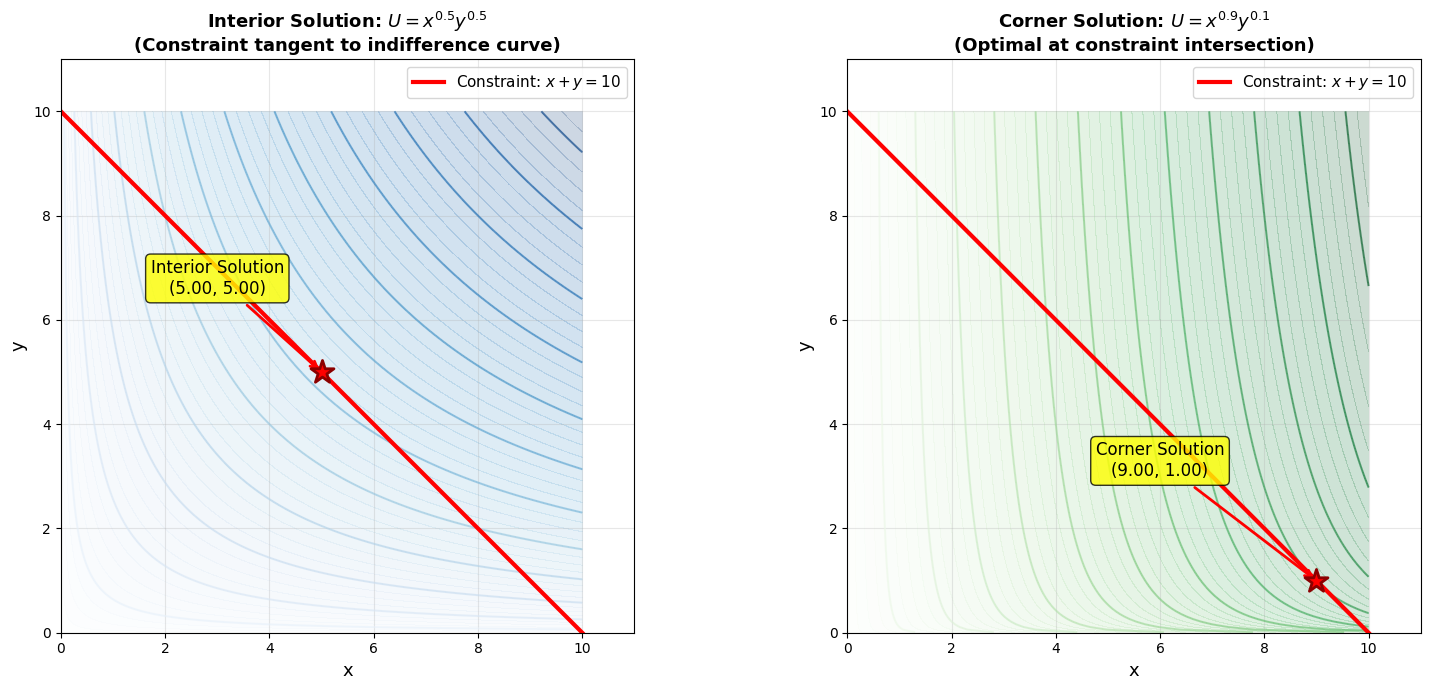


📊 Key Differences:

1️⃣ INTERIOR SOLUTION (x^0.5 * y^0.5):
   • Optimal point: (5.00, 5.00)
   • Both goods consumed in significant amounts
   • Constraint is tangent to an indifference curve
   • Solution is 'inside' the feasible region boundary

2️⃣ CORNER SOLUTION (x^0.9 * y^0.1):
   • Optimal point: (9.00, 1.00)
   • Almost all budget spent on x (strong preference)
   • Solution occurs at intersection of constraints (x + y = 10 and y ≈ 0)
   • No tangency - consumer would prefer even more x if possible


In [1]:
import numpy as np
from scipy.optimize import minimize

import matplotlib.pyplot as plt

# Example 1: Interior Solution
# Maximize U = x^0.5 * y^0.5 subject to x + y <= 10, x >= 0, y >= 0
def utility_interior(vars):
    x, y = vars
    return -(x**0.5 * y**0.5)  # Negative for minimization

constraint_interior = {'type': 'ineq', 'fun': lambda vars: 10 - vars[0] - vars[1]}
bounds_interior = [(0, None), (0, None)]
result_interior = minimize(utility_interior, [5, 5], constraints=constraint_interior, bounds=bounds_interior)
x_opt_int, y_opt_int = result_interior.x

# Example 2: Corner Solution
# Maximize U = x^0.9 * y^0.1 subject to x + y <= 10, x >= 0, y >= 0
def utility_corner(vars):
    x, y = vars
    return -(x**0.9 * y**0.1)  # Negative for minimization

constraint_corner = {'type': 'ineq', 'fun': lambda vars: 10 - vars[0] - vars[1]}
bounds_corner = [(0, None), (0, None)]
result_corner = minimize(utility_corner, [5, 5], constraints=constraint_corner, bounds=bounds_corner)
x_opt_cor, y_opt_cor = result_corner.x

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Plot 1: Interior Solution
x_vals = np.linspace(0.01, 10, 200)
y_vals = np.linspace(0.01, 10, 200)
X, Y = np.meshgrid(x_vals, y_vals)
U_interior = X**0.5 * Y**0.5

ax1.contour(X, Y, U_interior, levels=15, cmap='Blues', alpha=0.6)
ax1.contourf(X, Y, U_interior, levels=50, cmap='Blues', alpha=0.2)
ax1.plot([0, 10], [10, 0], 'r-', linewidth=3, label='Constraint: $x + y = 10$')
ax1.scatter([x_opt_int], [y_opt_int], color='red', s=300, zorder=5, marker='*', edgecolor='darkred', linewidth=2)
ax1.annotate(f'Interior Solution\n({x_opt_int:.2f}, {y_opt_int:.2f})', 
            xy=(x_opt_int, y_opt_int), xytext=(x_opt_int - 2, y_opt_int + 1.5),
            fontsize=12, ha='center', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8),
            arrowprops=dict(arrowstyle='->', color='red', lw=2))
ax1.set_xlabel('x', fontsize=13)
ax1.set_ylabel('y', fontsize=13)
ax1.set_title('Interior Solution: $U = x^{0.5} y^{0.5}$\n(Constraint tangent to indifference curve)', fontsize=13, fontweight='bold')
ax1.legend(loc='upper right', fontsize=11)
ax1.set_xlim(0, 11)
ax1.set_ylim(0, 11)
ax1.grid(True, alpha=0.3)
ax1.set_aspect('equal')

# Plot 2: Corner Solution
U_corner = X**0.9 * Y**0.1

ax2.contour(X, Y, U_corner, levels=15, cmap='Greens', alpha=0.6)
ax2.contourf(X, Y, U_corner, levels=50, cmap='Greens', alpha=0.2)
ax2.plot([0, 10], [10, 0], 'r-', linewidth=3, label='Constraint: $x + y = 10$')
ax2.scatter([x_opt_cor], [y_opt_cor], color='red', s=300, zorder=5, marker='*', edgecolor='darkred', linewidth=2)
ax2.annotate(f'Corner Solution\n({x_opt_cor:.2f}, {y_opt_cor:.2f})', 
            xy=(x_opt_cor, y_opt_cor), xytext=(x_opt_cor - 3, y_opt_cor + 2),
            fontsize=12, ha='center', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8),
            arrowprops=dict(arrowstyle='->', color='red', lw=2))
ax2.set_xlabel('x', fontsize=13)
ax2.set_ylabel('y', fontsize=13)
ax2.set_title('Corner Solution: $U = x^{0.9} y^{0.1}$\n(Optimal at constraint intersection)', fontsize=13, fontweight='bold')
ax2.legend(loc='upper right', fontsize=11)
ax2.set_xlim(0, 11)
ax2.set_ylim(0, 11)
ax2.grid(True, alpha=0.3)
ax2.set_aspect('equal')

plt.tight_layout()
plt.show()

print("\n📊 Key Differences:")
print(f"\n1️⃣ INTERIOR SOLUTION (x^0.5 * y^0.5):")
print(f"   • Optimal point: ({x_opt_int:.2f}, {y_opt_int:.2f})")
print(f"   • Both goods consumed in significant amounts")
print(f"   • Constraint is tangent to an indifference curve")
print(f"   • Solution is 'inside' the feasible region boundary")

print(f"\n2️⃣ CORNER SOLUTION (x^0.9 * y^0.1):")
print(f"   • Optimal point: ({x_opt_cor:.2f}, {y_opt_cor:.2f})")
print(f"   • Almost all budget spent on x (strong preference)")
print(f"   • Solution occurs at intersection of constraints (x + y = 10 and y ≈ 0)")
print(f"   • No tangency - consumer would prefer even more x if possible")

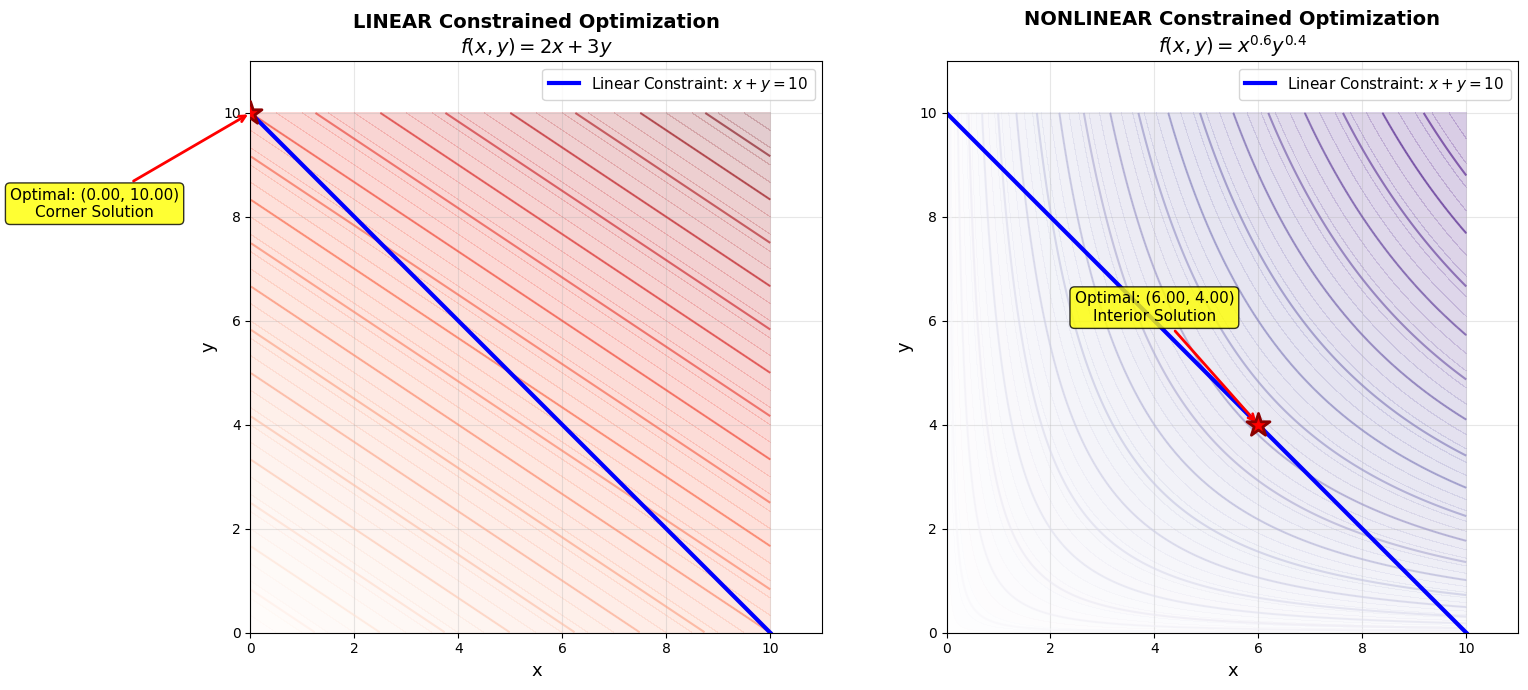


📊 COMPARISON: LINEAR vs NONLINEAR CONSTRAINED OPTIMIZATION

Aspect                         LINEAR                    NONLINEAR                
--------------------------------------------------------------------------------
Objective Function             f = 2x + 3y               f = x^0.6 * y^0.4        
Function Type                  Linear (Plane)            Nonlinear (Curved)       
Constraint                     x + y ≤ 10                x + y ≤ 10               
Optimal Solution               (0.00, 10.00)             (6.00, 4.00)             
Optimal Value                  30.00                     5.10                     
Solution Type                  Corner/Boundary           Interior                 
Tangency Condition             No tangency needed        Tangent to constraint    
Indifference Curves            Straight lines            Curved (convex)          

🔑 KEY DIFFERENCES:

1️⃣ LINEAR OPTIMIZATION:
   • Objective function forms a plane
   • Solution always at a c

In [4]:
import numpy as np
from scipy.optimize import minimize

# Comparison: Linear vs Nonlinear Constrained Optimization

import matplotlib.pyplot as plt

# LINEAR CONSTRAINED OPTIMIZATION
# Maximize f(x,y) = 2x + 3y subject to x + y <= 10, x >= 0, y >= 0
def linear_objective(vars):
    x, y = vars
    return -(2*x + 3*y)  # Negative for minimization

linear_constraint = {'type': 'ineq', 'fun': lambda vars: 10 - vars[0] - vars[1]}
linear_bounds = [(0, None), (0, None)]
result_linear = minimize(linear_objective, [5, 5], constraints=linear_constraint, bounds=linear_bounds)
x_opt_lin, y_opt_lin = result_linear.x

# NONLINEAR CONSTRAINED OPTIMIZATION
# Maximize f(x,y) = x^0.6 * y^0.4 subject to x + y <= 10, x >= 0, y >= 0
def nonlinear_objective(vars):
    x, y = vars
    return -(x**0.6 * y**0.4)  # Negative for minimization

nonlinear_constraint = {'type': 'ineq', 'fun': lambda vars: 10 - vars[0] - vars[1]}
nonlinear_bounds = [(0, None), (0, None)]
result_nonlinear = minimize(nonlinear_objective, [5, 5], constraints=nonlinear_constraint, bounds=nonlinear_bounds)
x_opt_nonlin, y_opt_nonlin = result_nonlinear.x

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Grid for plotting
x_plot = np.linspace(0.01, 10, 200)
y_plot = np.linspace(0.01, 10, 200)
X_plot, Y_plot = np.meshgrid(x_plot, y_plot)

# Plot 1: LINEAR CONSTRAINED
Z_linear = 2*X_plot + 3*Y_plot

ax1.contour(X_plot, Y_plot, Z_linear, levels=20, cmap='Reds', alpha=0.6)
ax1.contourf(X_plot, Y_plot, Z_linear, levels=50, cmap='Reds', alpha=0.2)
ax1.plot([0, 10], [10, 0], 'b-', linewidth=3, label='Linear Constraint: $x + y = 10$')
ax1.scatter([x_opt_lin], [y_opt_lin], color='red', s=300, zorder=5, marker='*', edgecolor='darkred', linewidth=2)
ax1.annotate(f'Optimal: ({x_opt_lin:.2f}, {y_opt_lin:.2f})\nCorner Solution', 
            xy=(x_opt_lin, y_opt_lin), xytext=(x_opt_lin - 3, y_opt_lin - 2),
            fontsize=11, ha='center', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8),
            arrowprops=dict(arrowstyle='->', color='red', lw=2))
ax1.set_xlabel('x', fontsize=13)
ax1.set_ylabel('y', fontsize=13)
ax1.set_title('LINEAR Constrained Optimization\n$f(x,y) = 2x + 3y$', fontsize=14, fontweight='bold')
ax1.legend(loc='upper right', fontsize=11)
ax1.set_xlim(0, 11)
ax1.set_ylim(0, 11)
ax1.grid(True, alpha=0.3)
ax1.set_aspect('equal')

# Plot 2: NONLINEAR CONSTRAINED
Z_nonlinear = X_plot**0.6 * Y_plot**0.4

ax2.contour(X_plot, Y_plot, Z_nonlinear, levels=20, cmap='Purples', alpha=0.6)
ax2.contourf(X_plot, Y_plot, Z_nonlinear, levels=50, cmap='Purples', alpha=0.2)
ax2.plot([0, 10], [10, 0], 'b-', linewidth=3, label='Linear Constraint: $x + y = 10$')
ax2.scatter([x_opt_nonlin], [y_opt_nonlin], color='red', s=300, zorder=5, marker='*', edgecolor='darkred', linewidth=2)
ax2.annotate(f'Optimal: ({x_opt_nonlin:.2f}, {y_opt_nonlin:.2f})\nInterior Solution', 
            xy=(x_opt_nonlin, y_opt_nonlin), xytext=(x_opt_nonlin - 2, y_opt_nonlin + 2),
            fontsize=11, ha='center', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8),
            arrowprops=dict(arrowstyle='->', color='red', lw=2))
ax2.set_xlabel('x', fontsize=13)
ax2.set_ylabel('y', fontsize=13)
ax2.set_title('NONLINEAR Constrained Optimization\n$f(x,y) = x^{0.6} y^{0.4}$', fontsize=14, fontweight='bold')
ax2.legend(loc='upper right', fontsize=11)
ax2.set_xlim(0, 11)
ax2.set_ylim(0, 11)
ax2.grid(True, alpha=0.3)
ax2.set_aspect('equal')

plt.tight_layout()
plt.show()

# Comparison Table
print("\n" + "="*80)
print("📊 COMPARISON: LINEAR vs NONLINEAR CONSTRAINED OPTIMIZATION")
print("="*80)

print(f"\n{'Aspect':<30} {'LINEAR':<25} {'NONLINEAR':<25}")
print("-"*80)
print(f"{'Objective Function':<30} {'f = 2x + 3y':<25} {'f = x^0.6 * y^0.4':<25}")
print(f"{'Function Type':<30} {'Linear (Plane)':<25} {'Nonlinear (Curved)':<25}")
print(f"{'Constraint':<30} {'x + y ≤ 10':<25} {'x + y ≤ 10':<25}")
print(f"{'Optimal Solution':<30} {f'({x_opt_lin:.2f}, {y_opt_lin:.2f})':<25} {f'({x_opt_nonlin:.2f}, {y_opt_nonlin:.2f})':<25}")
print(f"{'Optimal Value':<30} {f'{-result_linear.fun:.2f}':<25} {f'{-result_nonlinear.fun:.2f}':<25}")
print(f"{'Solution Type':<30} {'Corner/Boundary':<25} {'Interior':<25}")
print(f"{'Tangency Condition':<30} {'No tangency needed':<25} {'Tangent to constraint':<25}")
print(f"{'Indifference Curves':<30} {'Straight lines':<25} {'Curved (convex)':<25}")

print("\n" + "="*80)
print("🔑 KEY DIFFERENCES:")
print("="*80)
print("\n1️⃣ LINEAR OPTIMIZATION:")
print("   • Objective function forms a plane")
print("   • Solution always at a corner/vertex of feasible region")
print("   • No interior solutions (unless objective parallel to constraint)")
print("   • Simplex method can be used")
print("   • Example: Profit maximization with fixed prices")

print("\n2️⃣ NONLINEAR OPTIMIZATION:")
print("   • Objective function forms a curved surface")
print("   • Solution can be interior or at boundary")
print("   • Tangency condition between contours and constraint")
print("   • Requires gradient-based methods (Lagrange multipliers, KKT)")
print("   • Example: Utility maximization, production functions")

print("\n3️⃣ PRACTICAL IMPLICATIONS:")
print("   • Linear: Easier to solve, faster computation")
print("   • Nonlinear: More realistic for economic/engineering problems")
print("   • Nonlinear: May have multiple local optima")
print("   • Linear: Global optimum always found at vertices")